Here is a Python implementation of **Particle Swarm Optimization (PSO)** to minimize the function **\( f(x) = (x - 5)^2 \)**. This implementation follows the standard PSO process:

- Initialize a swarm of particles with random positions and velocities.
- Update each particle’s velocity and position based on **personal best** and **global best**.
- Continue iterating until convergence or reaching the maximum number of iterations.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the objective function f(x) = (x - 5)^2
def objective_function(x):
    return (x - 5) ** 2

In [3]:
# Particle Swarm Optimization (PSO) Implementation
class PSO:
    def __init__(self, num_particles=30, max_iterations=100, w=0.5, c1=1.5, c2=1.5):
        self.num_particles = num_particles  # Number of particles in the swarm
        self.max_iterations = max_iterations  # Max number of iterations
        self.w = w  # Inertia weight
        self.c1 = c1  # Cognitive coefficient
        self.c2 = c2  # Social coefficient

        # Initialize particle positions and velocities randomly
        self.positions = np.random.uniform(low=0, high=10, size=(num_particles, 1))
        self.velocities = np.random.uniform(low=-1, high=1, size=(num_particles, 1))

        # Initialize personal best positions and values
        self.p_best_positions = np.copy(self.positions)
        self.p_best_values = objective_function(self.p_best_positions)

        # Initialize global best position and value
        self.g_best_position = self.p_best_positions[np.argmin(self.p_best_values)]
        self.g_best_value = np.min(self.p_best_values)

    def optimize(self):
        best_values = []  # Store best values for visualization
        
        for iteration in range(self.max_iterations):
            # Evaluate fitness of each particle
            fitness_values = objective_function(self.positions)

            # Update personal bests
            better_mask = fitness_values < self.p_best_values
            self.p_best_positions[better_mask] = self.positions[better_mask]
            self.p_best_values[better_mask] = fitness_values[better_mask]

            # Update global best
            if np.min(fitness_values) < self.g_best_value:
                self.g_best_position = self.positions[np.argmin(fitness_values)]
                self.g_best_value = np.min(fitness_values)

            # Update velocity and position
            r1, r2 = np.random.rand(self.num_particles, 1), np.random.rand(self.num_particles, 1)
            self.velocities = (
                self.w * self.velocities +
                self.c1 * r1 * (self.p_best_positions - self.positions) +
                self.c2 * r2 * (self.g_best_position - self.positions)
            )
            self.positions += self.velocities

            best_values.append(self.g_best_value)  # Store best value for plotting

        return self.g_best_position, self.g_best_value, best_values

In [4]:
# Run PSO
pso = PSO()
best_position, best_value, best_values = pso.optimize()

# Print the results
print(f"Optimal position (x): {best_position[0]:.4f}")
print(f"Optimal function value (f(x)): {best_value:.4f}")

Optimal position (x): 5.0000
Optimal function value (f(x)): 0.0000


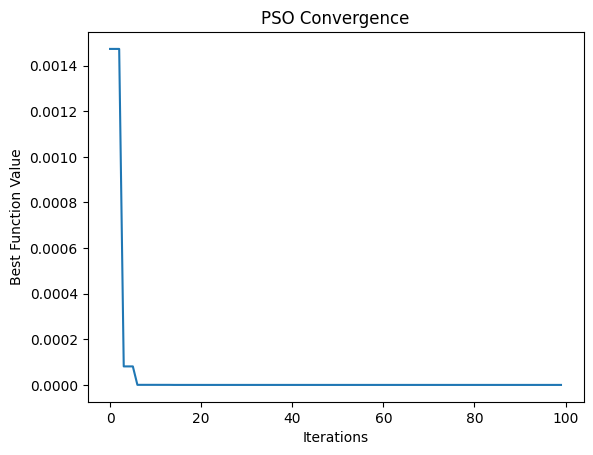

In [5]:
# Plot the convergence graph
plt.plot(best_values)
plt.xlabel("Iterations")
plt.ylabel("Best Function Value")
plt.title("PSO Convergence")
plt.show()

### **How it Works:**
1. **Initialize particles** with random positions in the range \([0,10]\) and random velocities.
2. **Evaluate the fitness** of each particle using \( f(x) = (x - 5)^2 \).
3. **Update personal and global bests**:
   - If a particle finds a better position, update its **personal best**.
   - If the swarm finds a better solution, update the **global best**.
4. **Update velocity and position** using the PSO velocity update equation.
5. **Repeat** the process for a given number of iterations.
6. **Plot the convergence graph** to visualize the optimization progress.

### **Expected Output:**
- The algorithm should find an **optimal position near \( x = 5 \)**.
- The function value **\( f(x) = 0 )** at convergence.
- A plot showing the convergence of the best function value over iterations.